In [14]:
# Salary Data Simple Linear Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/SHIELA4/BSIS2A_Felicitas-ShielaMaeB/refs/heads/main/Salary_Data1.csv')

In [16]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [17]:
# 2.) Handle missing data

print("\nMissing Values Before Cleaning:")
print(df.isna().sum())

 # Check for missing values


Missing Values Before Cleaning:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [18]:
# Drop rows with missing values (or use fillna() to fill with a value like the mean)
df = df.dropna()

# Remove rows with missing values

In [19]:
print("\nMissing Values After Cleaning:")
print(df.isna().sum())

# Check if missing values are removed


Missing Values After Cleaning:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [20]:
# 3.) The explanatory variables: Independent Variable (Years of Experience)

X = df[['Job Title']]  # Explanatory variable (Job Title)
y = df['Salary']

# Dependent variable (Salary)

In [21]:
# One-hot encode the 'Job Title' column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Create OneHotEncoder instance
encoded_X = encoder.fit_transform(X) # Fit and transform the 'Job Title' column

In [23]:
X = pd.get_dummies(X, columns=['Job Title'], drop_first=True)

In [24]:
# 4.) Model Fitting: Fit the model using Linear Regression from sklearn
model = LinearRegression()  # Initialize Linear Regression model
model.fit(X, y)  # Fit the model to the data

LinearRegression()

In [25]:
# 5.) Print the intercept and coefficient values after the model is trained
print(f"\nIntercept (β₀): {model.intercept_}")  # The intercept value, i.e., predicted salary when X = 0
print(f"Coefficient (β₁): {model.coef_[0]}")  # The coefficient of 'Years of Experience' (effect on salary)


Intercept (β₀): 75000.00000000012
Coefficient (β₁): -19999.999999999705


In [26]:
# 6.) Predict salaries using the model
y_pred = model.predict(X)  # Predict the Salary based on the fitted model

In [28]:


 # Fit the OLS model using statsmodels

# Convert X and y to numeric types
X_with_const = sm.add_constant(X)
X_with_const = X_with_const.astype(float) #convert columns to float to avoid object dtype errors
y = y.astype(float) # convert y to float to avoid object dtype errors


ols_model = sm.OLS(y, X_with_const).fit()  # Fit the OLS model using statsmodels

In [29]:
# Print summary (includes p-values, coefficients, R-squared, etc.)

print(f"\nModel Summary (using statsmodels):\n{ols_model.summary()}")

# Summary of statsmodels results


Model Summary (using statsmodels):
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     67.72
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:15:47   Log-Likelihood:                -78684.
No. Observations:                6698   AIC:                         1.578e+05
Df Residuals:                    6507   BIC:                         1.591e+05
Df Model:                         190                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

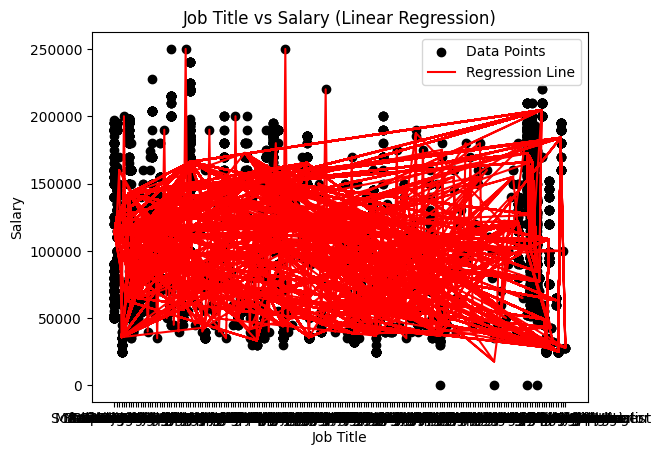

In [32]:
# 8.) Plotting the Regression Line and the Data Points
# Assuming 'JobItle' is the column for years of experience:
plt.scatter(df['Job Title'], y, color='black', label='Data Points')  # Actual data points
plt.plot(df['Job Title'], y_pred, color='red', label='Regression Line')  # Regression line
plt.title("Job Title vs Salary (Linear Regression)")
plt.xlabel("Job Title")  # Label for X-axis
plt.ylabel("Salary")  # Label for Y-axis
plt.legend()  # Display legend for plot
plt.show()  # Show the plot

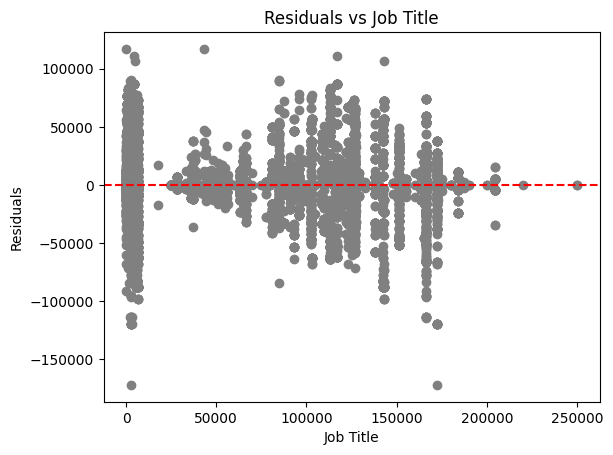

In [34]:

# 9.) Residuals Plot: Check for the residuals (actual - predicted values)
residuals = y - y_pred  # Calculate residuals

# Assuming 'predicted_values' will be on the x-axis:
# If you want to plot residuals against predicted values:
plt.scatter(y_pred, residuals, color='gray')

# OR

# If you want to plot residuals against the index of the data points:
plt.scatter(range(len(residuals)), residuals, color='gray')

plt.axhline(0, color='red', linestyle='--')  # Red dashed line for residuals = 0
plt.title("Residuals vs Job Title")
plt.xlabel("Job Title")  # Label for X-axis
plt.ylabel("Residuals")  # Label for Y-axis
plt.show()  # Display residuals plot

In [35]:
# 10.) Maximum and minimum predicted Salaries:
print(f"\nMaximum predicted Salary: {y_pred.max()}")  # Highest predicted salary
print(f"Minimum predicted Salary: {y_pred.min()}")  # Lowest predicted salary


Maximum predicted Salary: 250000.00000000052
Minimum predicted Salary: 17674.999999999738


In [38]:

# Assuming X is your DataFrame with one-hot encoded features
X = X.astype(float)  # Convert all columns of X to float
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()  # Fit the model, using the existing 'y' variable

In [40]:
print(model.summary())  # Displays regression results

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     67.72
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:23:59   Log-Likelihood:                -78684.
No. Observations:                6698   AIC:                         1.578e+05
Df Residuals:                    6507   BIC:                         1.591e+05
Df Model:                         190                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [44]:
# Extract the predicted values
y_pred = model.predict(X)

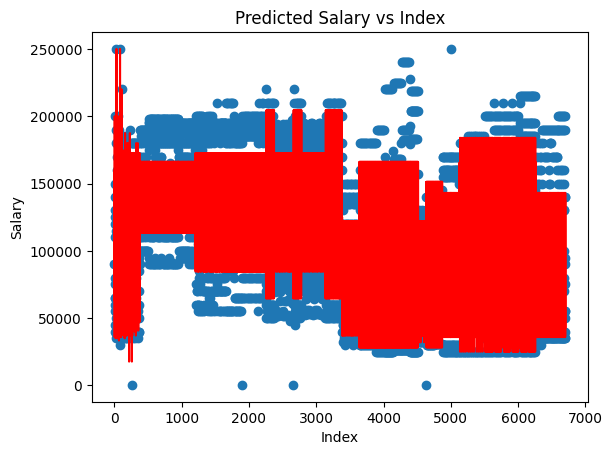

In [48]:

# Instead of plotting against 'Job Title', consider plotting against the index:
plt.scatter(X.index, y)  # Plot against the index of the DataFrame X
plt.plot(X.index, model.predict(X), color='red')  # Regression line
plt.xlabel("Index")  # Label for X-axis
plt.ylabel("Salary")  # Label for Y-axis
plt.title("Predicted Salary vs Index")  # Title of the plot
plt.show()

In [49]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model.resid)
print(dw)

2.0014590809084067


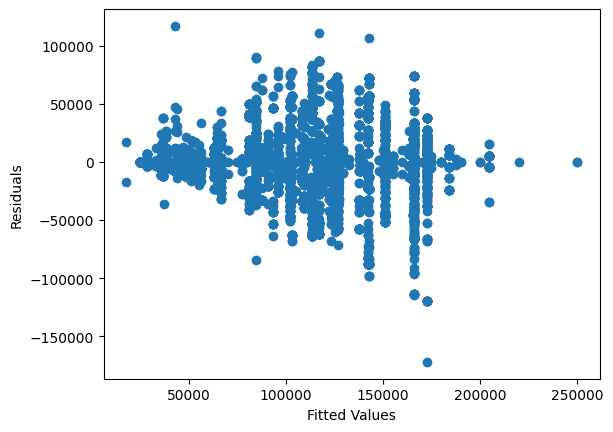

In [50]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [51]:
print(model.rsquared)  # R-squared value
print(model.rsquared_adj)  # Adjusted R-squared
print(model.fvalue)  # F-statistic value

0.66412893062891
0.6543217225175673
67.71844984718926


In [52]:
print(model.pvalues)  # P-values for coefficients

const                                 0.015701
Job Title_Accountant                  0.648659
Job Title_Administrative Assistant    0.510773
Job Title_Back end Developer          0.379176
Job Title_Business Analyst            0.947565
                                        ...   
Job Title_UX Designer                 0.909311
Job Title_UX Researcher               0.819790
Job Title_VP of Finance               0.004416
Job Title_VP of Operations            0.008814
Job Title_Web Developer               0.783842
Length: 191, dtype: float64


In [53]:
print(model.conf_int())  # Confidence intervals for the coefficients

                                                0              1
const                                14156.403038  135843.596962
Job Title_Accountant               -106045.840007   66045.840007
Job Title_Administrative Assistant  -99517.883336   49517.883336
Job Title_Back end Developer        -33615.587504   88320.710455
Job Title_Business Analyst          -72017.883336   77017.883336
...                                           ...            ...
Job Title_UX Designer               -81045.840007   91045.840007
Job Title_UX Researcher             -96045.840007   76045.840007
Job Title_VP of Finance              38954.159993  211045.840007
Job Title_VP of Operations           28954.159993  201045.840007
Job Title_Web Developer             -69755.492115   52629.055334

[191 rows x 2 columns]
